In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =  pd.read_csv(r"C:\Users\arinc\OneDrive\Desktop\Tasks\Task 5\Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
df.drop(columns = 'Unnamed: 0',inplace =True)

In [6]:
df.head().T

,0,1,2,3,4
TV,230.1,44.5,17.2,151.5,180.8
Radio,37.8,39.3,45.9,41.3,10.8
Newspaper,69.2,45.1,69.3,58.5,58.4
Sales,22.1,10.4,9.3,18.5,12.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


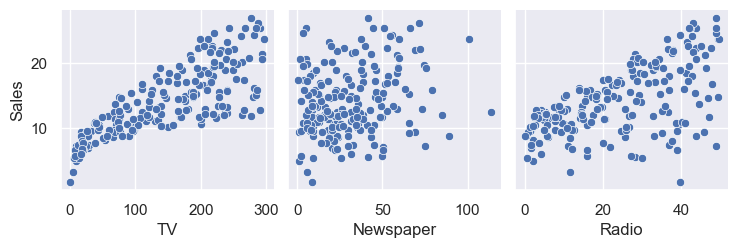

In [72]:
sns.set_theme(style="darkgrid")
sns.pairplot(x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', data=df)

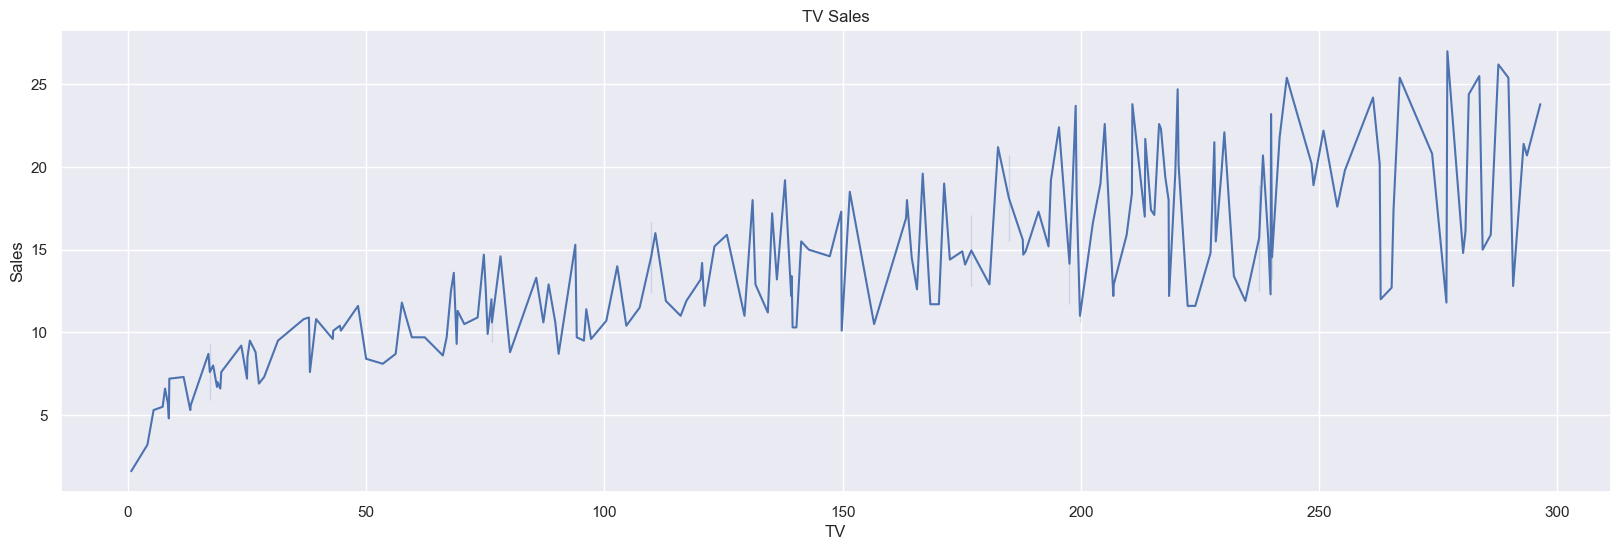

In [79]:
plt.figure(figsize=(20,6))
plt.title('TV Sales')
sns.lineplot(x='TV',y='Sales', data=df)
plt.show()

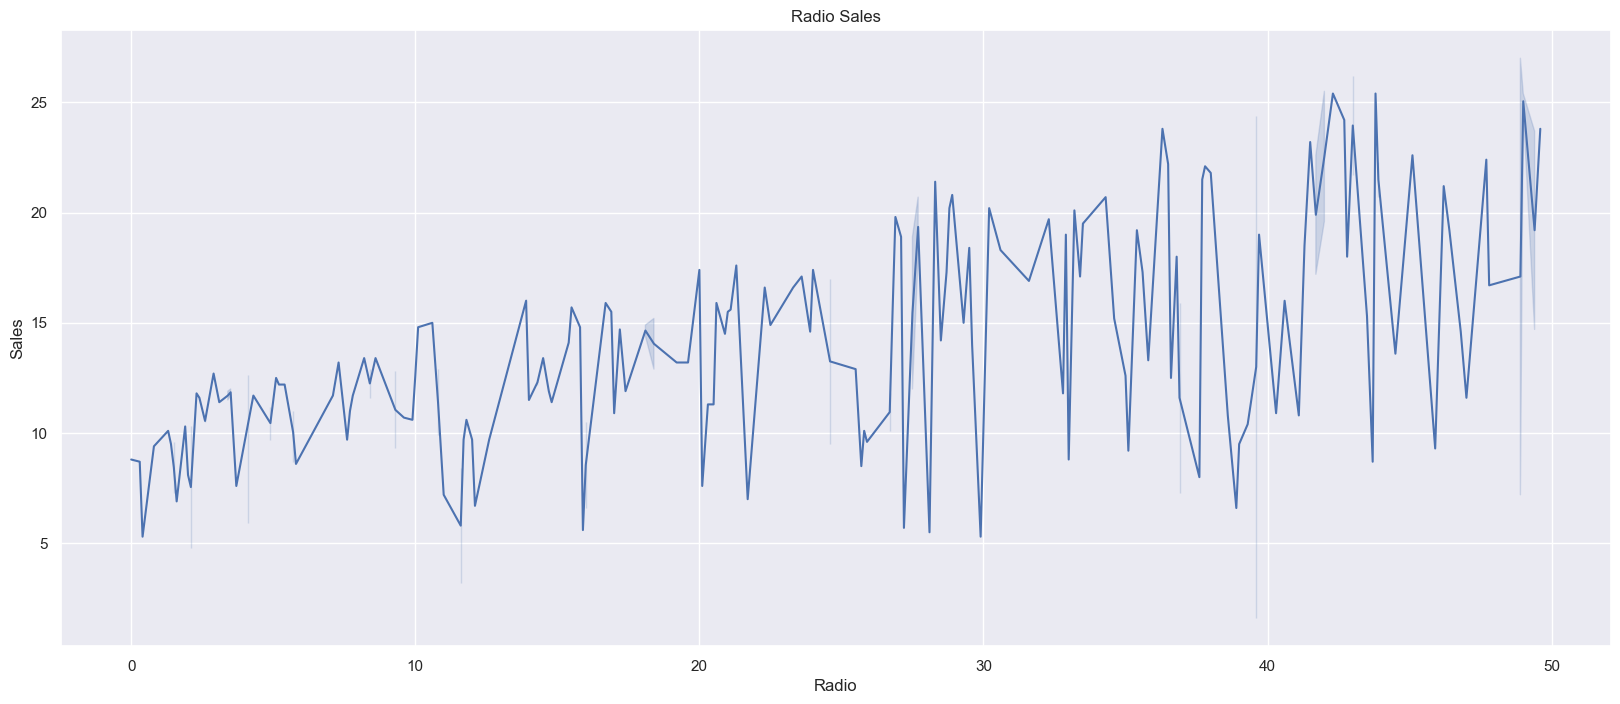

In [80]:
plt.figure(figsize=(20,8))
plt.title('Radio Sales')
sns.lineplot(x='Radio',y='Sales', data=df)
plt.show()

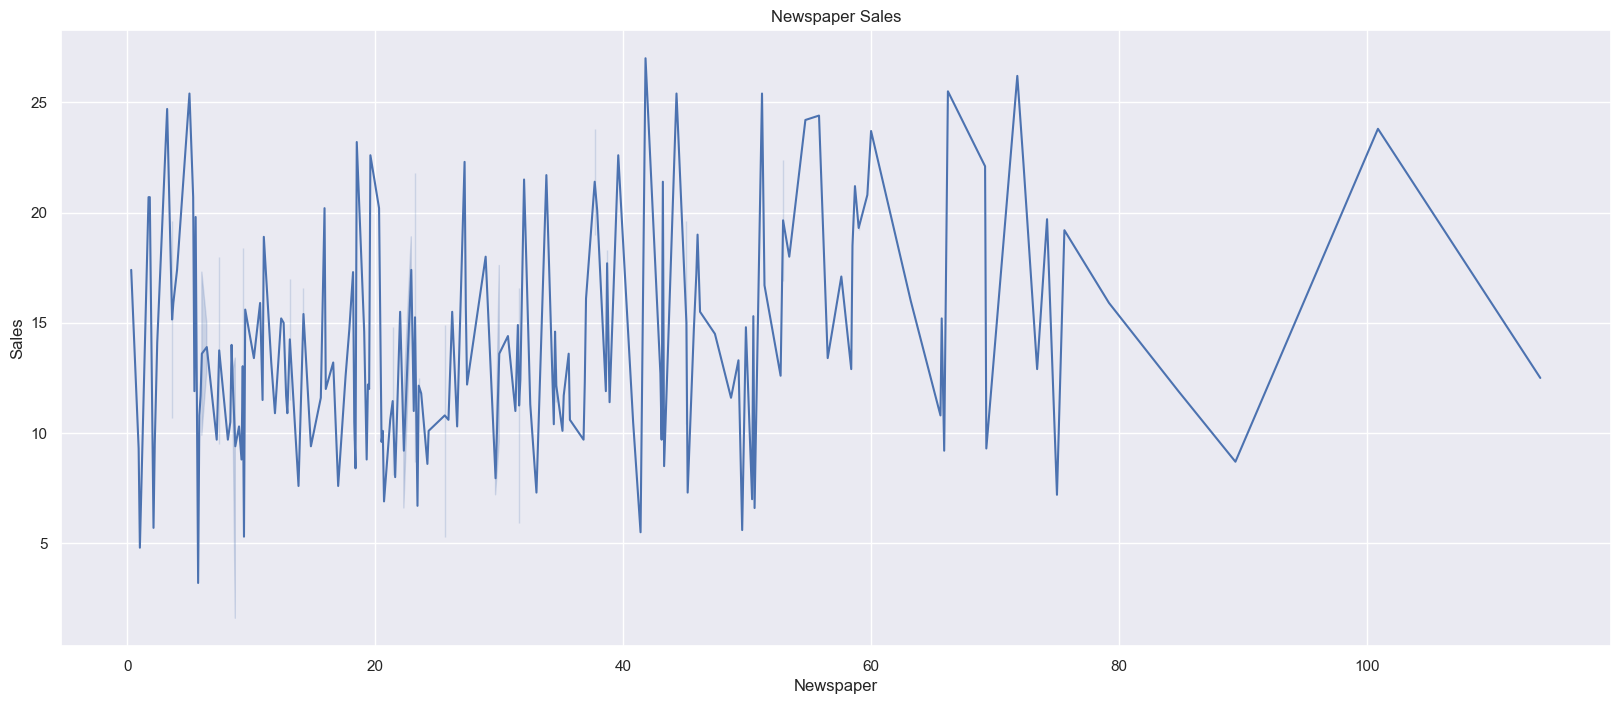

In [81]:
plt.figure(figsize=(20,8))
plt.title('Newspaper Sales')
sns.lineplot(x='Newspaper',y='Sales', data=df)
plt.show()

In [11]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


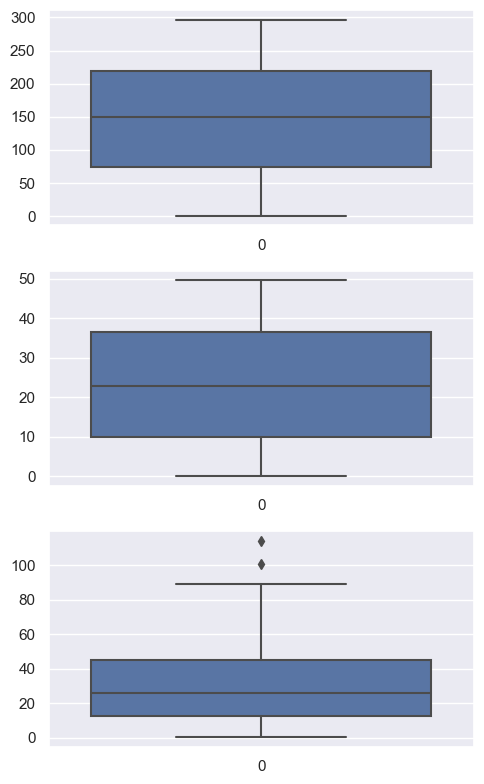

In [87]:
fig, axs = plt.subplots(3, figsize=(5,8))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Radio'], ax = axs[1])
plt3 =sns.boxplot(df['Newspaper'], ax = axs[2])
plt.tight_layout()

<Axes: >

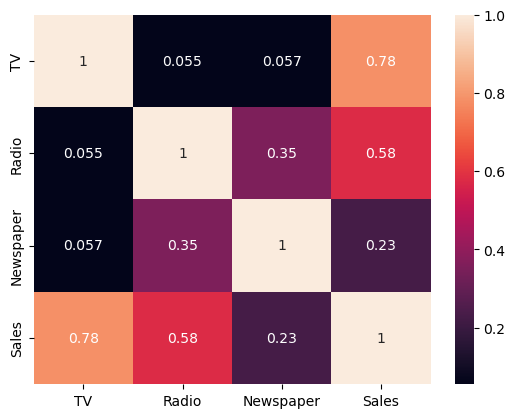

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
X = df.drop(columns = 'Sales')
y = np.log(df['Sales'])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler1 = MinMaxScaler()

In [33]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesRegressor

In [40]:
# linear regression
step1 = scaler1

step2 = LinearRegression()

pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('cross_valScore', np.mean(cross_val_score(step2,X_train,y_train,scoring='r2')))

R2 score 0.7280912236491601
MAE 0.13201086652522104
cross_valScore 0.8190661162808179


In [19]:
# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer()

In [20]:
# X_trainT = pt.fit_transform(X_train)
# X_testT = pt.fit_transform(X_test)

In [21]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [22]:
# step1 = scaler

# step2 = LinearRegression()

# pipe = Pipeline([
#         ('step1', step1),
#         ('step2', step2)])

# pipe.fit(X_trainT, y_train)

# y_pred2 = pipe.predict(X_testT)

# print('R2 score', r2_score(y_test, y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))
# print('cross_valScore', np.mean(cross_val_score(step2,X,y,scoring='r2')))

R2 score 0.7280912236491595
MAE 0.13201086652522115
cross_valScore 0.811712305685154


In [41]:
# Ridge regression
step1 = scaler

step2 = Ridge(alpha= 10)

pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('cross_valScore', np.mean(cross_val_score(step2,X_train,y_train,scoring='r2')))

R2 score 0.7344721010472814
MAE 0.12978939958652688
cross_valScore 0.819058727886566


In [42]:
# Lasso regression
step1 = scaler

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('cross_valScore', np.mean(cross_val_score(step2,X_train,y_train,scoring='r2')))

R2 score 0.7281794293697521
MAE 0.13190307972252358
cross_valScore 0.8190704423355664


In [43]:
# KNeighbours regression
step1 = scaler

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('cross_valScore', np.mean(cross_val_score(step2,X_train,y_train,scoring='r2')))

R2 score 0.903239163794253
MAE 0.07492063523733868
cross_valScore 0.9009973130767616


In [45]:
# Decision Tree regressor

step1 = scaler1

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('cross_valScore', np.mean(cross_val_score(step2,X_train,y_train,scoring='r2')))

R2 score 0.9028480596346398
MAE 0.06141146339623569
cross_valScore 0.933626308653183


In [49]:
# SVM
step1 = scaler1

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('cross_valScore', np.mean(cross_val_score(step2,X_train,y_train,scoring='r2')))

R2 score 0.8871432027871198
MAE 0.07703868129845148
cross_valScore 0.8902074672862206


In [50]:
# Random forest
step1 = scaler

step2 = RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)
pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('cross_valScore', np.mean(cross_val_score(step2,X_train,y_train,scoring='r2')))

R2 score 0.9655708690368098
MAE 0.05058263562878984
cross_valScore 0.9168258885819223


In [51]:
# Extra trees
step1 = scaler

step2 = ExtraTreesRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=None,
                             max_features=0.75,
                             max_depth=15)

pipe = Pipeline([('step1', step1),('step2', step2)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('cross_valScore', np.mean(cross_val_score(step2,X_train,y_train,scoring='r2')))

R2 score 0.9475690985957871
MAE 0.050489206746247
cross_valScore 0.9478792582033175


In [52]:
# Ada boost regressor
step1 = scaler

step2 = AdaBoostRegressor(n_estimators=15,
                             learning_rate=1.0)

pipe = Pipeline([('step1', step1),('step2', step2)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('cross_valScore', np.mean(cross_val_score(step2,X_train,y_train,scoring='r2')))

R2 score 0.9222177892632025
MAE 0.07461351710881876
cross_valScore 0.9125604807706035


In [53]:
# Gradient boost
step1 = scaler

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([('step1', step1),('step2', step2)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('cross_valScore', np.mean(cross_val_score(step2,X_train,y_train,scoring='r2')))

R2 score 0.9135315598072609
MAE 0.0496419522970365
cross_valScore 0.9510840298082079
